In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from distributions_numpy import *

In [16]:
def target_distribution(x):
    return np.exp(-0.5 * ((x - 5) / 2)**2) / (2 * np.sqrt(2 * np.pi))

def proposal_distribution(x, mean=0, std=5):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))

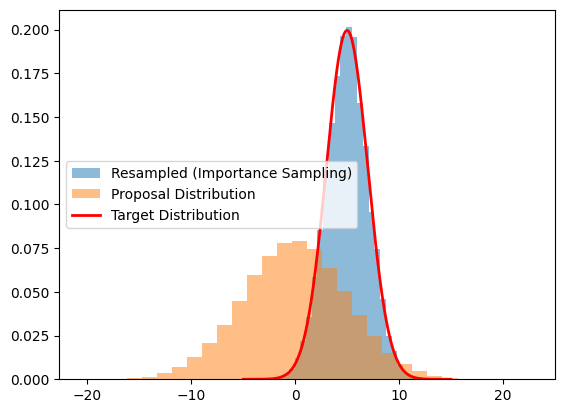

In [17]:
# Generate samples from the proposal distribution
n_samples = 100000
proposal_mean = 0
proposal_std = 5
samples = np.random.normal(proposal_mean, proposal_std, n_samples)

# Calculate importance weights
weights = target_distribution(samples) / proposal_distribution(samples, proposal_mean, proposal_std)

# Normalize weights
weights /= np.sum(weights)

# Resample based on the weights to get samples approximating the target distribution
resampled_indices = np.random.choice(np.arange(n_samples), size=n_samples, p=weights)
resampled_samples = samples[resampled_indices]

# Plot the results
plt.hist(resampled_samples, bins=30, density=True, alpha=0.5, label="Resampled (Importance Sampling)")
plt.hist(samples, bins=30, density=True, alpha=0.5, label="Proposal Distribution")
x = np.linspace(-5, 15, 1000)
plt.plot(x, target_distribution(x), 'r-', lw=2, label="Target Distribution")
plt.legend()
plt.show()

In [15]:
observed_data = np.array([4.8, 5.1, 4.9])

def simulator(theta, n=3):
    return np.random.normal(theta, 1, n)

def proposal_distribution(size):
    return np.random.uniform(0, 10, size)

def distance(simulated_data, observed_data):
    return np.sum((simulated_data - observed_data)**2)


n_samples = 100000

theta_proposals = proposal_distribution(n_samples)

distances = np.zeros(n_samples)
for i in range(n_samples):
    simulated_data = simulator(theta_proposals[i])
    distances[i] = distance(simulated_data, observed_data)

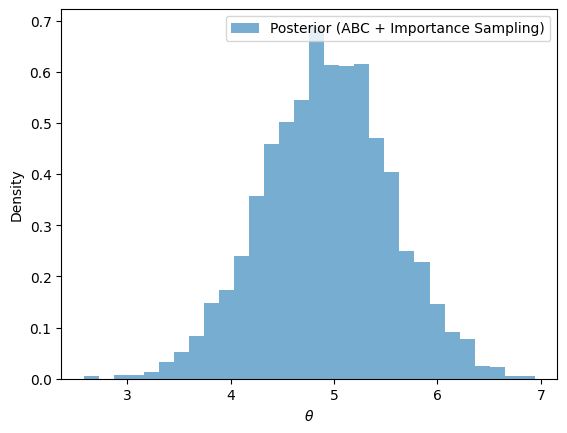

In [11]:
# ABC threshold: accept samples if the distance is below a threshold
epsilon = 1.0  # This is the tolerance level; lower means stricter comparison
accepted_indices = np.where(distances < epsilon)[0]

# Assign weights based on distance (lower distance gets higher weight)
weights = np.exp(-distances[accepted_indices] / epsilon)  # A simple weighting scheme
weights /= np.sum(weights)  # Normalize the weights

# Resample the accepted θs according to the weights
resampled_indices = np.random.choice(accepted_indices, size=n_samples, p=weights)
posterior_samples = theta_proposals[resampled_indices]

# Plot the posterior samples
plt.hist(posterior_samples, bins=30, density=True, alpha=0.6, label="Posterior (ABC + Importance Sampling)")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.show()